In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

In [ ]:
diamonds = sns.load_dataset('diamonds')
#Print first 5 rows
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(diamonds.info())
print(diamonds.head())
#print(diamonds.describe().T)
print(diamonds.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63


In [7]:
print(diamonds.isnull().sum())
print(diamonds.isnull().sum().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
0


In [9]:
#Selecting only numeric columns
numeric_cols = diamonds.select_dtypes(include=[np.number])
print(numeric_cols.columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [10]:
#Compute skewness of each numeric column
skewness = numeric_cols.skew()
print("\nSkewness of Numeric Features: \n", skewness)


Skewness of Numeric Features: 
 carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64


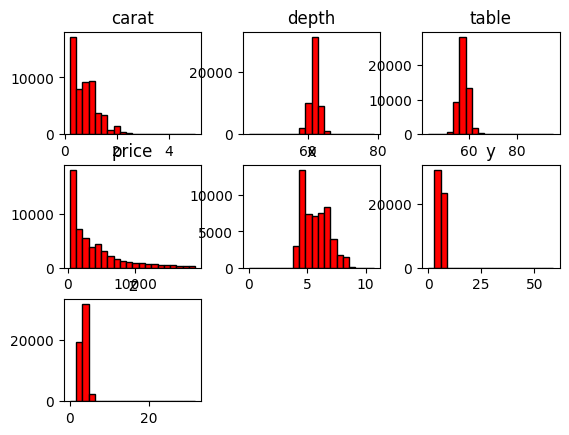

In [11]:
#Visualization to check skewness using histogram
#Plot histograms to visualize skewness
diamonds.hist(bins=20, color='red', grid=False, edgecolor="black")
plt.title("Histograms of Numeric Features in Iris Dataset")
plt.show()

In [14]:
#Compute Q1 (25h percentile) and Q3 (75th percentile)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat       0.64
depth       1.50
table       3.00
price    4374.25
x           1.83
y           1.82
z           1.13
dtype: float64


In [15]:
#Define outliers as values outside 1.5*IQR range
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum()
print("\nOutlier Counts in Numeric Features: \n", outlier_counts)


Outlier Counts in Numeric Features: 
 carat    1889
depth    2545
table     605
price    3540
x          32
y          29
z          49
dtype: int64


In [16]:
#Print rows containing outliers 
print("\nRows Containing Outliers: \n", diamonds[outliers.any(axis=1)])


Rows Containing Outliers: 
        carat        cut color clarity  depth  table  price     x     y     z
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
8       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
24      0.31  Very Good     J     SI1   58.1   62.0    353  4.44  4.47  2.59
35      0.23       Good     F     VS1   58.2   59.0    402  4.06  4.08  2.37
42      0.26       Good     D     VS2   65.2   56.0    403  3.99  4.02  2.61
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53882   0.71       Fair     D     VS1   65.4   59.0   2747  5.62  5.58  3.66
53886   0.70       Good     D     VS2   58.0   62.0   2749  5.78  5.87  3.38
53890   0.73       Good     E     SI1   57.9   55.0   2749  6.00  5.96  3.46
53895   0.70       Good     F     VS1   57.8   61.0   2751  5.83  5.79  3.36
53927   0.79       Good     F     SI1   58.1   59.0   2756  6.06  6.13  3.54

[6416 rows x 10 columns]
